# Dimensionality Reduction With PCA - Toy Datasets

In this notebook we explore PCA analysis using toy datasets provided by scikit learn. 
It is a continuation of the previous notebook where we defined PCA and saw how it relates to the covariance matrix of our data. 

## Breast Cancer

The first dataset we examine is the 1995 [breast cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) set. 
It contains 569 samples with features originating from digitized images of breast mass. 
There are 30 features along with a label indicating if the sample was canerous. 
The featues include measurements such as:
- radius
- area
- concavity
- etc.


In [1]:
# Import packages that will be used
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
%matplotlib widget

In [2]:
bc = load_breast_cancer()

In [3]:
# Get samples and classification for each. 
X, y = bc.data, bc.target
print(X.shape, y.shape)

(569, 30) (569,)


In [4]:
# Mean-center the data and compute the covariance matrix
X = (X - X.mean(axis=0)) / X.std(axis=0)
C = np.cov(X, ddof=1, rowvar=False)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(C)

In [6]:
ordered = np.argsort(eigenvalues)[::-1] # reverse to have highest to lowest
sorted_eigenvalues = eigenvalues[ordered]
sorted_eigenvectors = eigenvectors[ordered]
print("Eigenvalues:", sorted_eigenvalues)

Eigenvalues: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


In [7]:
explained_var = sorted_eigenvalues / np.sum(sorted_eigenvalues)
accum_explained_var = [explained_var[0]]
for i in range(1, len(explained_var)):
    accum_explained_var.append(accum_explained_var[i-1] + explained_var[i])

print("First 2 explained variance:", accum_explained_var[1])
print("First 3 explained variance:", accum_explained_var[2])

First 2 explained variance: 0.6324320765155946
First 3 explained variance: 0.7263637090899084


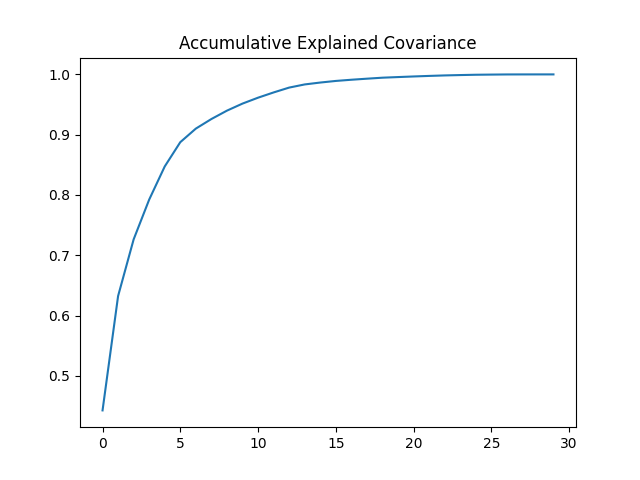

In [8]:
fig, ax = plt.subplots()
ax.plot(accum_explained_var)
ax.set_title("Accumulative Explained Covariance")
plt.show()

(569, 3)


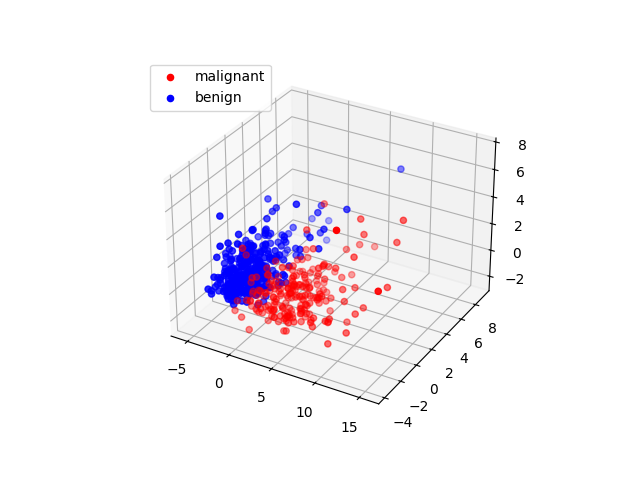

In [9]:
# plot the first 3 principal components
k = 3
R = np.matmul(X, sorted_eigenvectors[:, :k])
print(R.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R[:,0][y==0], R[:,1][y==0], R[:,2][y==0], c='r', label="malignant")
ax.scatter(R[:,0][y==1], R[:,1][y==1], R[:,2][y==1], c='b', label="benign")
ax.legend(loc="upper left")
plt.show()

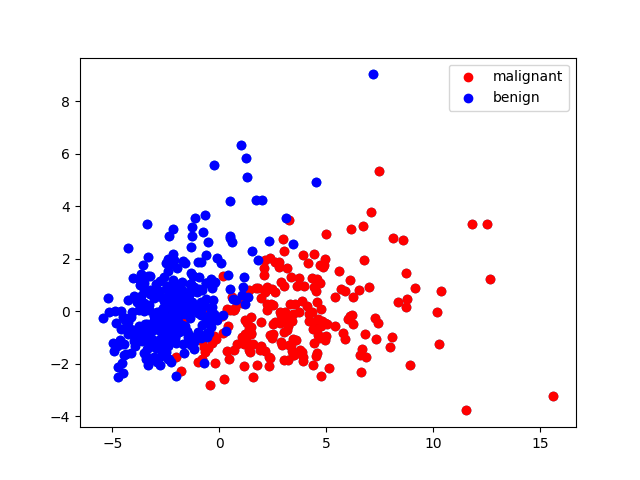

In [10]:
# 5. Dimension reduction
k = 2
R = np.matmul(X, sorted_eigenvectors[:, :k])
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(R[:,0], R[:,1])
ax.scatter(R[:,0][y==0], R[:,1][y==0], c='r', label="malignant")
ax.scatter(R[:,0][y==1], R[:,1][y==1], c='b', label="benign")
ax.legend(loc="upper right")
plt.show()

In the above analysis we see the first 3 principal components explain approx 72% of the variance within the data. 
Plotting the first 3 and 2 principal components respectively we see a separation between malignant and benign tumors. 
This suggess we can use the two 

## Handwritten Digits

Our second dataset consists of hand written digits from 0 to 9 provided by [UC Irvine](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). 
Each sample is an 8x8 gray scaled image with a label corresponding to what digit it is.
Alternatively we can view each sample as have 64 features each with an integer value in [0,255] where 0 is black (background) and 255 white (written.)


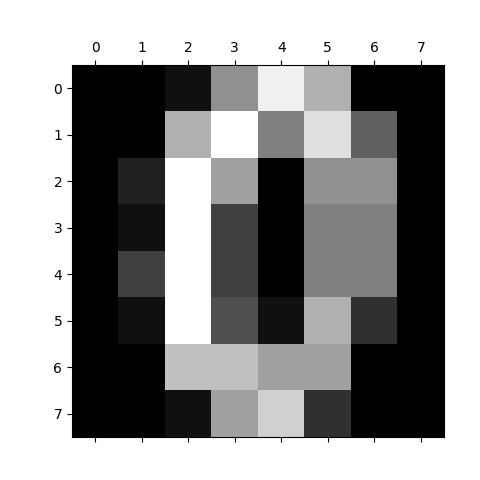

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

# Get samples and classification for each. 
X, y = digits.data, digits.target

# Plot in image
plt.gray()
plt.matshow(digits.images[10])
plt.show()

In [39]:
# Mean-center the data and compute the covariance matrix
# Some features have all 0 values. When centering this will result in 0/0 division. Use `nan_to_num` these nan values with 0. 
X = np.nan_to_num((X - X.mean(axis=0)) / X.std(axis=0))
C = np.cov(X, ddof=1, rowvar=False)

C:\Users\Kyle\AppData\Local\Temp\ipykernel_13048\1086079129.py:3: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - X.mean(axis=0)) / X.std(axis=0))


In [33]:
eigenvalues, eigenvectors = np.linalg.eig(C)
ordered = np.argsort(eigenvalues)[::-1] # reverse to have highest to lowest
sorted_eigenvalues = eigenvalues[ordered]
sorted_eigenvectors = eigenvectors[ordered]
print("Eigenvalues:", sorted_eigenvalues)

Eigenvalues: [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.27692285 0.258273   0.24783029 0.2423566
 0.217582   0.20799593 0.2000909  0.18983516 0.17612894 0.16875236
 0.15818474 0.14311427 0.13321081 0.12426371 0.11932898 0.11188655
 0.10250434 0.09840876 0.09018543 0.08246812 0.07635394 0.06328961
 0.05037444 0.         0.         0.        ]


In [34]:
explained_var = sorted_eigenvalues / np.sum(sorted_eigenvalues)
accum_explained_var = [explained_var[0]]
for i in range(1, len(explained_var)):
    accum_explained_var.append(accum_explained_var[i-1] + explained_var[i])

print("First 2 explained variance:", accum_explained_var[1])
print("First 3 explained variance:", accum_explained_var[2])

First 2 explained variance: 0.215949705008328
First 3 explained variance: 0.3003938539345736


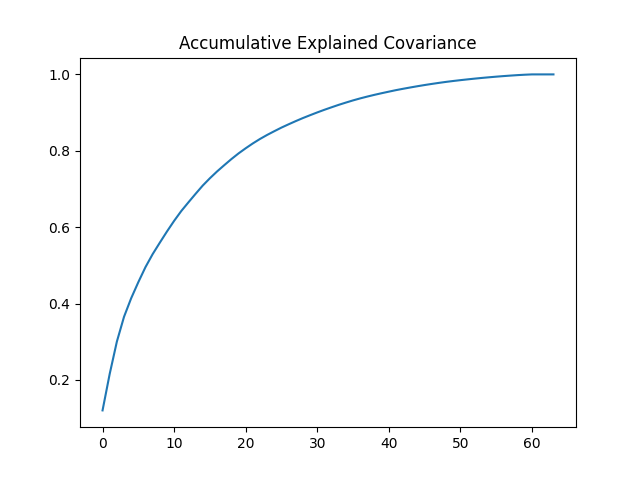

In [35]:
fig, ax = plt.subplots()
ax.plot(accum_explained_var)
ax.set_title("Accumulative Explained Covariance")
plt.show()

By looking at the explained variance, we see about 30 principal components are needed to explain 90% of the variance - more on this later. 

(1797, 3)


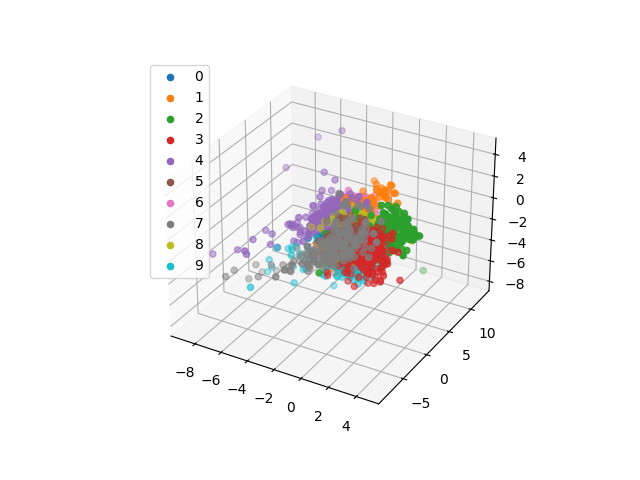

In [36]:
# plot the first 3 principal components
k = 3
R = np.matmul(X, sorted_eigenvectors[:, :k])
print(R.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(R[:,0][y==i], R[:,1][y==i], R[:,2][y==i], label=i)
ax.legend(loc="upper left")
plt.show()

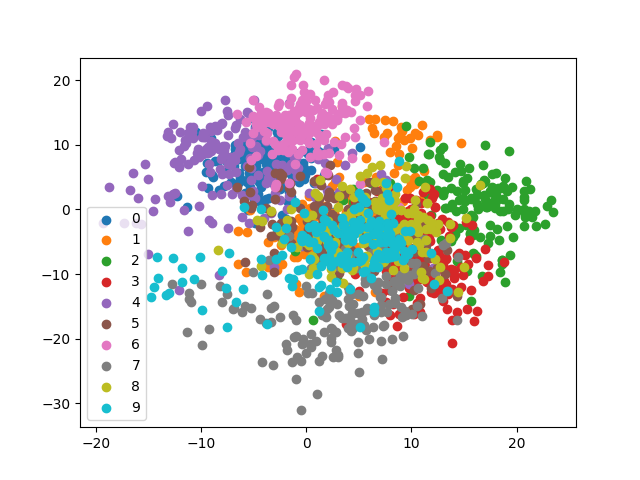

In [45]:
# 5. Dimension reduction
k = 2
R = np.matmul(X, sorted_eigenvectors[:, :k])
fig2 = plt.figure()
ax = fig2.add_subplot(111)
for i in range(10):
    ax.scatter(R[:,0][y==i], R[:,1][y==i], label=i)
ax.legend(loc="lower left")
plt.show()

Observing our first two principal components we see some clusters form such as those for 0, 6, and 2.
However we also see these clusters overlap with other clusters such as those for 5, 8, and 9. 

As noted above, the first two principal components only explain about 20% of the variance within the data. 
This suggests we would need more principal components to have clear clusters for each digit. 
There are a few reasons the explained variance is low:
- Our data is a 8x8 image - this resolution may be too small for being able to distinguish between different digits (e.g. a 1 vs. a 7.)
- We stacked data into a 64 dimensional vector. By doing so, we've lost the spatial information contained within. Instead, we could look to take the average over small blocks (e.g.2x2) and uses these values as our features. 